Agora que já criamos a estrutura básica do nosso datalake, precisamos ir um pouco mais além. Vamos construir um data lakehouse. Antes de eu introduzir as ferramentos open source que vamos usar, temos que falar primeiro sobre as diferentes coneitos relacionados à gestão e armazenamento de dados:

***Data Warehouse:***
surgiu na década de 1980 e foi amplamente usado nos anos 90. É uma solução para a necessidade de armazenar e analisar grandes volumes de dados empresariais. A empresa IBM foi pioneira na criação do primeiro sistema de data warehouse comercialmente disponível, chamado "Information Warehouse", em 1983. Um data warehouse é uma solução centralizada de armazenamento de dados projetada para suportar análises e relatórios empresariais. Ele é construído com uma estrutura rígida e organizada, seguindo um esquema predefinido (esquema em estrela ou em floco de neve). Os dados são extraídos de várias fontes, transformados e carregados no data warehouse em um formato estruturado. O foco principal é fornecer dados consolidados e confiáveis para análises históricas, permitindo consultas complexas e agregações.
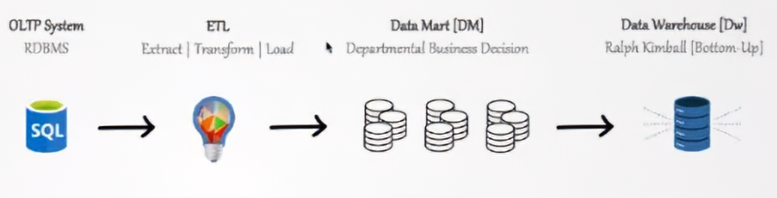

***Data Lake:***
O conceito de data lake emergiu no início dos anos 2000, impulsionado pelo aumento exponencial no volume, na variedade e na velocidade dos dados gerados pelas empresas. O termo "data lake" foi cunhado por James Dixon, fundador da empresa Pentaho, em 2010. Um data lake é um repositório de dados bruto e em larga escala que armazena dados de várias origens em seu formato original, sem a necessidade de uma estrutura rígida. O data lake é caracterizado pela sua natureza "schema-on-read", o que significa que a estrutura e a interpretação dos dados são aplicadas quando os dados são acessados, em vez de serem definidas previamente durante a ingestão dos dados. Isso permite a flexibilidade de armazenar dados de diferentes formatos e sem a necessidade de definir um esquema fixo antecipadamente.
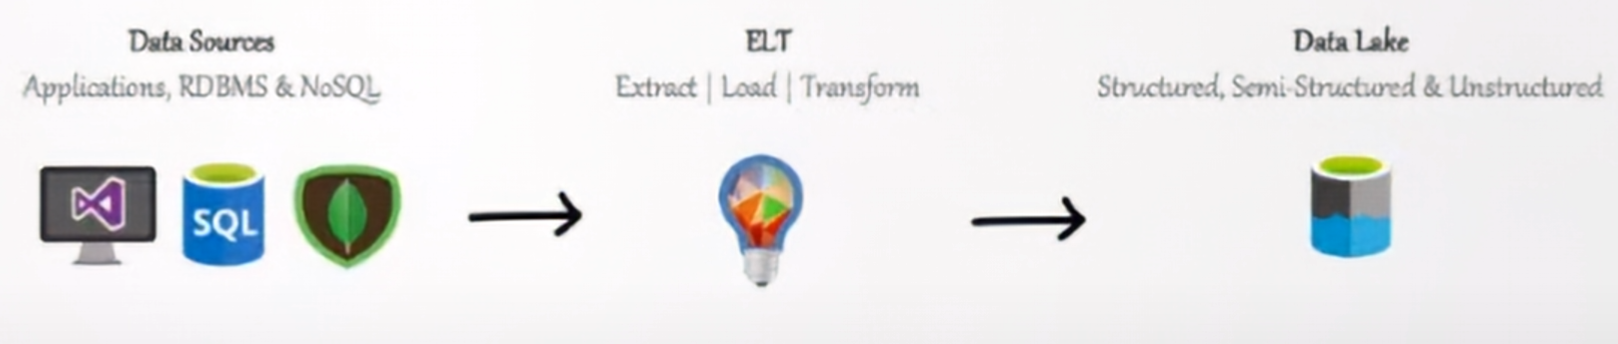

***Data Lakehouse:***
O conceito de data lakehouse surgiu mais recentemente, no final da década de 2010, como uma resposta aos desafios enfrentados pelos data lakes tradicionais, como a falta de governança, qualidade de dados e desempenho de consultas. O conceito de data lakehouse é uma evolução recente que combina elementos do data warehouse e do data lake. É uma abordagem que busca combinar a organização e governança dos dados do data warehouse com a flexibilidade de armazenamento do data lake, criando um data lake transacional. O data lakehouse mantém dados brutos e em formato original como um data lake, mas também aplica esquemas e estruturas durante a ingestão para fornecer uma camada semântica e otimizada para consultas. Isso permite que os usuários executem análises avançadas em tempo real, bem como análises em retrospectivas tradicionais. O data lakehouse pode ser implementado utilizando tecnologias como o Delta Lake (Databricks), Iceberg (Netflix) e Hudi (Uber).
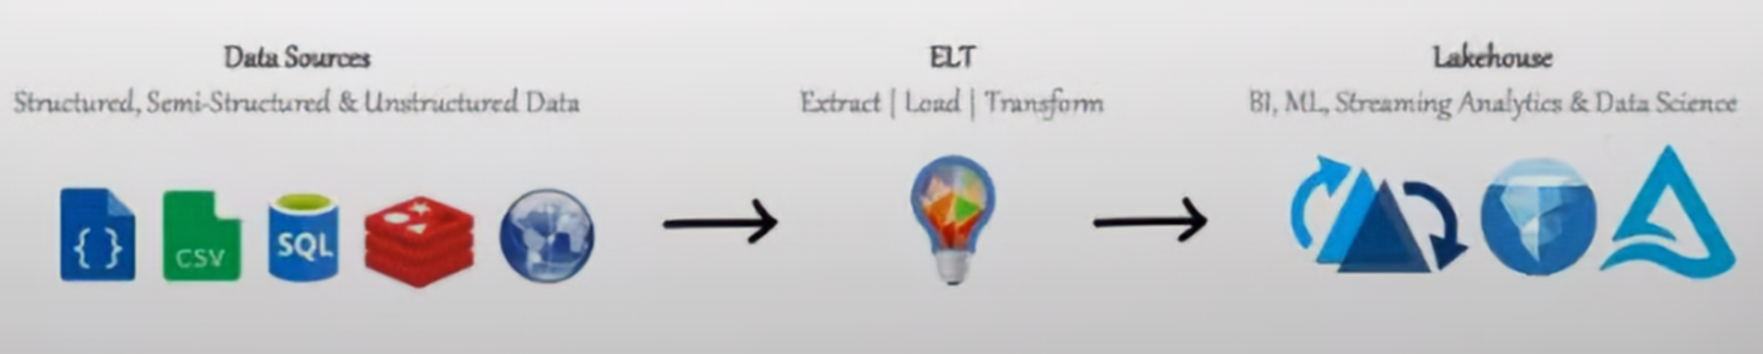

### Características de um Data Lakehouse

#### ACID Transactions (Atomicidade, Consistência, Isolamento e Durabilidade):

São um conjunto de propriedades que garantem a integridade e a confiabilidade das transações em sistemas de banco de dados.
- ***Atomicidade (Atomicity)***: A atomicidade garante que uma transação seja uma unidade indivisível de trabalho. Isso significa que uma transação é executada inteiramente ou não é executada de forma alguma. Se qualquer parte da transação falhar, todas as alterações feitas pela transação são desfeitas (rollback) e o banco de dados retorna ao estado anterior à transação.

- ***Consistência (Consistency)***: A consistência garante que uma transação leve o banco de dados de um estado válido para outro estado válido. Isso significa que as restrições de integridade, as regras de negócio e as relações definidas no banco de dados são mantidas durante a execução da transação. Se uma transação violar qualquer restrição ou regra, ela é revertida (rollback) para manter a consistência do banco de dados.

- ***Isolamento (Isolation)***: O isolamento garante que uma transação seja executada independentemente de outras transações concorrentes. Cada transação deve ser isolada das outras para evitar interferências indesejadas. O isolamento é alcançado por meio de bloqueios e controle de concorrência, garantindo que os efeitos de uma transação não sejam visíveis para outras transações até que ela seja concluída (commit). Isso evita problemas como leituras sujas, leituras não repetíveis e escritas fantasmas.

- ***Durabilidade (Durability)***: A durabilidade garante que as alterações feitas por uma transação persistam no banco de dados mesmo em caso de falhas ou reinicializações do sistema. Uma vez que uma transação é confirmada (commit), suas alterações são permanentes e não serão perdidas. O banco de dados deve ser capaz de recuperar todas as transações confirmadas, mesmo em caso de falhas graves.

#### Merge-On-Read and Copy-On-Write
São estratégias utilizadas em sistemas de datalakehouse para otimizar o desempenho e a eficiência. 
O Merge-on-Read (MoR) é uma estratégia em que os dados brutos e não processados são armazenados em um formato de armazenamento distribuído, e a transformação e agregação desses dados ocorrem apenas quando são lidos. Os dados são adicionados ao data lakehouse continuamente, sem nenhuma modificação ou agregação imediata. Quando uma consulta é executada, os dados são lidos diretamente do data lakehouse e, em seguida, são processados e agregados conforme necessário. Isso permite que os dados sejam lidos e processados de maneira flexível, evitando a necessidade de transformar todos os dados antes do armazenamento. Essa abordagem é comumente usada em arquiteturas modernas de big data e análise em tempo real.
O Copy-on-Write (CoW) é uma estratégia em que, ao realizar uma modificação ou atualização nos dados, uma cópia dos dados afetados é feita, em vez de modificar diretamente os dados existentes. Quando uma alteração é feita em um dado, em vez de sobrescrevê-lo no local, uma nova cópia é criada e a modificação é aplicada à nova cópia. Isso garante que as versões anteriores dos dados permaneçam intactas e acessíveis.
O MOR é adequado para casos em que é necessário armazenar grandes volumes de dados brutos e processá-los sob demanda, permitindo flexibilidade e agilidade nas análises. O COW é útil quando se deseja garantir a integridade dos dados e preservar versões anteriores, minimizando o impacto das operações de gravação em termos de desempenho e bloqueios.

#### Time travel
Refere-se à capacidade de acessar e visualizar os dados em um estado anterior. É uma funcionalidade que permite consultar e recuperar versões anteriores dos dados, mesmo depois que eles foram modificados ou excluídos.
O time travel é possível em bancos de dados que suportam a captura de alterações (change data capture, CDC) ou mantêm um registro de todas as operações realizadas nos dados. Esses registros podem ser usados para reconstruir o estado dos dados em um determinado momento no passado.

#### Bulk Load
É um método utilizado para inserir grandes volumes de dados em um banco de dados de forma rápida e eficiente. Essa técnica é especialmente útil quando se lida com conjuntos de dados volumosos que precisam ser carregados de maneira eficiente para 

#### Partition Evolution
É um conceito relacionado ao gerenciamento e manutenção de partições em um banco de dados. Refere-se ao processo de modificação, reorganização ou evolução de partições ao longo do tempo para acomodar padrões de dados em mudança e melhorar o desempenho. A evolução da partição envolve fazer alterações nas partições à medida que os dados evoluem e novos dados são adicionados.

#### Data Compaction
Essa técnica envolve a consolidação ou junção de vários arquivos pequenos em arquivos maiores para melhorar o desempenho e eficiência das consultas. Quando um Data Lake recebe dados de várias fontes, é comum que os arquivos sejam gravados em tamanhos menores devido à natureza do processo de ingestão. No entanto, quando ocorre a execução de consultas, especialmente consultas que escaneiam vários arquivos, os arquivos menores podem resultar em um alto overhead de E/S (entrada/saída) e processamento, afetando negativamente o desempenho da consulta. A compaction de arquivos no Data Lake envolve a agregação desses arquivos menores em arquivos maiores, criando assim menos arquivos, mas de tamanho maior.

#### Multidimensional Z-Order
A Z-order curve é uma curva fractal que percorre o espaço multidimensional em uma sequência de pontos. A curva possui uma propriedade importante: pontos próximos no espaço multidimensional tendem a ter Z-values próximos na curva. Isso permite agrupar dados que são espacialmente ou logicamente próximos em regiões contíguas na curva. A ideia principal por trás do Z-order é reorganizar os dados de forma a preservar a proximidade espacial ou lógica entre os pontos de dados.
Ao aplicar a técnica Z-order para indexação de dados, os pontos de dados são mapeados para seus respectivos Z-values e organizados em uma estrutura de índice. Isso permite que as consultas multidimensionais sejam traduzidas em consultas na curva Z-order, explorando sua propriedade de proximidade. Assim, consultas que envolvem intervalos ou regiões em várias dimensões podem ser otimizadas, pois pontos próximos na curva estão mais propensos a estar próximos no espaço multidimensional.

#### Schema Evolution
À medida que um sistema evolui, é comum que o esquema do banco de dados precise ser atualizado para acomodar novos requisitos, melhorias de desempenho, correções de erros ou novos recursos. A evolução do esquema pode incluir a adição, remoção ou modificação de tabelas, colunas, restrições, índices ou relacionamentos.

#### Incremental Query
É uma abordagem para executar consultas em um banco de dados ou sistema de processamento de dados, onde apenas os dados alterados desde a última execução da consulta são processados. Em vez de executar a consulta em todo o conjunto de dados, apenas as atualizações ou inserções mais recentes são consideradas. A consulta incremental é particularmente útil em cenários em que os dados estão mudando constantemente e apenas as alterações mais recentes são relevantes para a consulta. Isso pode incluir casos em que os dados estão sendo atualizados em tempo real, como em fluxos de dados contínuos, ou quando há grandes volumes de dados e a consulta precisa ser executada de forma eficiente.

### Apache Iceberg

***Foco principal: Controle de versão, schema evolution e gerenciamento de metadados.***

O desenvolvimento do Apache Iceberg começou em 2018 na Netflix, que buscava uma solução para lidar com grandes volumes de dados em constante evolução. A equipe do Netflix começou a trabalhar em uma estrutura que permitiria consultas eficientes em dados incrementais, suportando transações e operações de atualização e exclusão de registros. Em abril de 2019, o projeto Apache Iceberg foi anunciado publicamente como um projeto de código aberto. Ele se juntou à Apache Software Foundation como um projeto de alto nível e começou a ganhar reconhecimento e adoção em toda a comunidade de big data. Desde então, o Apache Iceberg tem evoluído e crescido rapidamente. A estrutura tem sido aprimorada com recursos como suporte a schema evolution, gerenciamento de metadados detalhados, partition evolution, estatísticas e suporte a time travel). Esses recursos foram projetados para melhorar o desempenho, a escalabilidade e a flexibilidade no processamento de dados incrementais. Atualmente, as Iceberg tables são amplamente utilizadas em diversos setores e são suportadas por várias ferramentas e ecossistemas de big data, como o Apache Hive, o Apache Spark e o Presto. 

### Apache Hudi

***Foco principal: Eficiência de ingestão e atualização incremental de dados.***

O projeto Hudi foi iniciado pela empresa Uber Technologies como uma solução interna para lidar com grandes volumes de dados e suportar operações de atualização e exclusão em um ambiente distribuído baseado no Hadoop. A necessidade de desenvolver o Hudi surgiu devido aos desafios enfrentados pela Uber ao trabalhar com dados em constante evolução. À medida que os dados eram atualizados, era necessário processá-los novamente por completo, o que resultava em altos custos computacionais e atrasos significativos. Além disso, a falta de suporte nativo para operações de atualização e exclusão de registros era uma limitação para as operações analíticas.

A equipe do Uber começou a desenvolver o Hudi para superar esses desafios. A ideia central por trás do Hudi era fornecer um mecanismo eficiente para executar atualizações incrementais em grandes conjuntos de dados, suportar exclusões e permitir consultas rápidas e precisas em tempo real. Em maio de 2018, o Uber anunciou o Hudi como um projeto de código aberto e o contribuiu para a Apache Software Foundation. O projeto foi aceito como um projeto de incubação da Apache e, posteriormente, em 2019, tornou-se um projeto de alto nível da Apache.

Desde então, o Apache Hudi tem evoluído e crescido rapidamente. Ele se tornou uma ferramenta amplamente utilizada para lidar com dados em constante evolução e para fornecer operações de atualização e exclusão em ecossistemas distribuídos, como o Apache Hadoop e o Apache Spark.  O Apache Hudi oferece recursos poderosos para o processamento de dados em constante evolução:
- ***Time Travel***: O recurso Time Travel no Apache Hudi é baseado na captura de alterações. Ele registra todas as operações de inserção, atualização e exclusão em um log de alterações chamado "Hoodie Delta Log". Isso permite que o Hudi reconstrua o estado dos dados em qualquer ponto no tempo, consultando o log e aplicando as alterações relevantes. Os registros do log são armazenados em arquivos particionados e compactados para uma recuperação eficiente.

- ***Incremental Query***: O Apache Hudi suporta consultas incrementais usando os registros de alterações do Delta Log. Em vez de processar todo o conjunto de dados em cada consulta, o Hudi apenas processa as alterações desde a última consulta. Ele aplica essas alterações aos dados existentes, mantendo uma visão atualizada dos dados incrementais. Isso permite que as consultas sejam executadas de forma eficiente e rápida, lidando apenas com as alterações mais recentes.

- ***Partition Evolution***: O recurso de Partition Evolution no Hudi permite adicionar, modificar ou excluir partições em um conjunto de dados existente sem a necessidade de reprocessar todo o conjunto de dados. Ele funciona reescrevendo metadados específicos de partição sem afetar os dados subjacentes. Isso é possível porque o Hudi armazena metadados de partição separadamente dos dados reais, permitindo a evolução flexível da estrutura de particionamento sem afetar a integridade dos dados.

* ***Bulk Load***: O Bulk Load é uma etapa inicial na construção de tabelas Hudi, que envolve a carga eficiente de grandes volumes de dados. Durante o processo de carga em massa, o Hudi otimiza a gravação dos dados em formato Parquet, compactando os arquivos para reduzir o espaço em disco e melhorar o desempenho da leitura. Ele também aproveita recursos de processamento distribuído, como o Apache Spark, para realizar a carga de dados em paralelo, o que acelera significativamente o processo.

- ***Z-Ordering***: O Z-Ordering é uma técnica de otimização de consultas que reorganiza os dados dentro dos arquivos do Hudi com base em um ou mais atributos. Ele cria uma ordem específica com base nesses atributos, agrupando registros semelhantes próximos uns dos outros. Isso melhora o desempenho das consultas que envolvem filtragem ou junção em colunas específicas, pois os dados relevantes estão fisicamente próximos, reduzindo a necessidade de leitura de registros desnecessários.

- ***Merge-on-Read (MOR)***: O Merge-on-Read é uma estratégia de processamento do Hudi que combina a gravação incremental com a compactação de dados. Durante a gravação incremental, as alterações são aplicadas a arquivos Delta existentes. Periodicamente, esses arquivos são mesclados (merged) em arquivos maiores para otimizar a eficiência do armazenamento e do processamento. A mesclagem de arquivos Delta permite que o Hudi mantenha um equilíbrio entre a granularidade da gravação incremental e o desempenho da leitura, reduzindo a sobrecarga de acesso

### Delta Lake

***Foco principal: Transações ACID, controle de versão e suporte a incremental queries.***

É um projeto de código aberto desenvolvido pela Databricks que foi lançado em 2019. Sua história tem suas raízes na necessidade de fornecer recursos avançados de gerenciamento de dados para sistemas de armazenamento distribuído, como o Apache Spark. Antes do Delta Lake, os sistemas de armazenamento distribuído, como o Hadoop, ofereciam suporte a formatos de arquivo como Parquet e ORC, que eram altamente eficientes para leitura e processamento em lotes, mas tinham limitações quando se tratava de operações de atualização e exclusão de dados.

A ideia central por trás do Delta Lake é combinar a eficiência de leitura e processamento em lotes dos formatos de arquivo otimizados com a capacidade de suportar operações de escrita de forma transacional. Isso torna o Delta Lake uma solução atraente para cenários em que os dados estão em constante mudança e requerem atualizações ou exclusões frequentes. 
Desde o seu lançamento, o Delta Lake tem ganhado popularidade e adoção significativa na comunidade de big data. Além das funcionalidades básicas de transações e controle de versão, o Delta Lake também oferece recursos avançados, como otimizações de desempenho, suporte a schema evolution, integração com pipelines de ingestão de dados em tempo real e suporte a consultas incrementais e time travel.

## Source para Landing

Vamos criar o processo de ETL que irá enviar os dados brutos da source zone para algo mais estruturado e limpo na landing zone. Para um utorial podemos coletar a base usando Pandas e transformando para um dataframe do Spark~, localmente. Em um ambiente de desenvolvimento profissional não seria bem assim, já que você poderia estar lidando com um grande volume de dados, e trabalhar localmente ou ler como um dataframe do Pandas é inviável. Nesse caso você poderia usar EMR, Sagemaker, um notebook do Glue ou até mesmo o Athena, casos os dados estejam catalogados, o que possibilita criar um worktype pra trabalhar com spark num jupyter notebook. São ferramentes que te permitem ter um ambiente de teste com spark configurado e a escalabilidade que você precisa.

In [7]:
from pyspark.sql import SparkSession
import pandas as pd 
# Inicializar SparkSession
spark = SparkSession.builder.appName(
    'video_games_review').config("spark.driver.memory", "15g").getOrCreate()

books_df = pd.read_json('http://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Video_Games_5.json.gz', lines = True)

In [8]:
books_df['style'] = books_df['style'].astype(str)
books_df['image'] = books_df['image'].astype(str)
spark_books_df = spark.createDataFrame(books_df)

1. Vamos converter todos os valores faltantes como nan ou NaN para Null, identificador padrão de dado faltante no pyspark. Basta substituir esses valores por None.

In [9]:
import numpy as np
import pyspark.sql.functions as F
for column in ['vote','style', 'image', 'reviewerName', 'reviewText', 'summary']:
    spark_books_df = spark_books_df.withColumn(column,F.when(F.isnan(F.col(column)),None).otherwise(F.col(column)))

In [10]:
columns = ['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
           'reviewText', 'summary', 'unixReviewTime', 'vote', 'style', 'image']

spark_books_df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in columns]
   ).show()

+-------+----------+----------+----+------------+----------+-------+--------------+------+------+------+
|overall|reviewTime|reviewerID|asin|reviewerName|reviewText|summary|unixReviewTime|  vote| style| image|
+-------+----------+----------+----+------------+----------+-------+--------------+------+------+------+
|      0|         0|         0|   0|         104|       158|    109|             0|389784|208340|493943|
+-------+----------+----------+----+------------+----------+-------+--------------+------+------+------+



2. O parse que converte um string dicionário (ex: "{'a':1, 'b':2}") somente entende caso os valores estejam em aspas duplas, daí a necessidade de converter aspas simples em duplas.

In [11]:
spark_books_df = spark_books_df.withColumn("style", F.regexp_replace("style", "'", "\""))

In [14]:
udf_string_to_len_list = F.udf(lambda x:len([elem for elem in x[1:-1].split(',')]) if x is not None else 0)

Agora vamos para a estruturação de features:

3. A coluna contém uma lista de links de imagens, mas é raramente preenchida. Como não precisamos por ora de imagens, vamos apenas retornar o número de imagens;
4. A coluna **reviwTime** indica uma data. Podemos convertê-la para o formato **timestamp**;
5. A coluna **style** é uma string com um dicionário. A função **get_json_object** faz um parse nesse dicionário, o que nos possibilita transformar as keys em colunas do dataframe;
6. Devemos garantir o devido formato de cada feature da coluna.

In [12]:
from pyspark.sql.types import TimestampType
import datetime
@F.udf(TimestampType())
def parse_datetime(date_string):
    try:
        # Parse the datetime string using a custom format
        dt = datetime.datetime.strptime(date_string, "%m %d, %Y")
        return dt
    except ValueError:
        # Return null if the datetime string cannot be parsed
        return None

df_final = spark_books_df.select(
    F.get_json_object(F.col("style"), "$.Format:").alias("Format_style"),
    F.get_json_object(F.col("style"), "$.Edition:").alias("Edition_style"),
    F.get_json_object(F.col("style"), "$.Platform:").alias("Platform_style"),
    F.get_json_object(F.col("style"), "$.Color:").alias("Color_style"),
    udf_string_to_len_list(F.col("image")).cast('int').alias("number_of_images"),
    parse_datetime(F.col("reviewTime")).cast('timestamp').alias('reviewTime'),
    F.col("overall").cast('int'),
    F.col("verified").cast('boolean'),
    F.col('reviewerID').cast('string'),
    F.col('asin').cast('string'),
    F.col('reviewerName').cast('string'),
    F.col('reviewText').cast('string'),
    F.col('summary').cast('string'),
    F.col('unixReviewTime').cast('bigint'),
    F.col('vote').cast('int')
    )

Podemos ver pelo schema do dataframe que está tudo ok.

In [16]:
df_final.printSchema()

root
 |-- Format_style: string (nullable = true)
 |-- Edition_style: string (nullable = true)
 |-- Platform_style: string (nullable = true)
 |-- Color_style: string (nullable = true)
 |-- number_of_images: integer (nullable = true)
 |-- reviewTime: timestamp (nullable = true)
 |-- overall: integer (nullable = true)
 |-- verified: boolean (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)
 |-- vote: integer (nullable = true)



In [17]:
df_final.show(vertical=True)

-RECORD 0--------------------------------
 Format_style     | null                 
 Edition_style    | null                 
 Platform_style   | null                 
 Color_style      | null                 
 number_of_images | 0                    
 reviewTime       | 2015-10-17 00:00:00  
 overall          | 5                    
 verified         | true                 
 reviewerID       | A1HP7NVNPFMA4N       
 asin             | 0700026657           
 reviewerName     | Ambrosia075          
 reviewText       | This game is a bi... 
 summary          | but when you do i... 
 unixReviewTime   | 1445040000           
 vote             | null                 
-RECORD 1--------------------------------
 Format_style     | null                 
 Edition_style    | null                 
 Platform_style   | null                 
 Color_style      | null                 
 number_of_images | 0                    
 reviewTime       | 2015-07-27 00:00:00  
 overall          | 4             

Verificamos a quantidade de nulos. garantindo que o parse da coluna ***style*** retornou valores.

In [18]:
columns = ['Format_style', 'Edition_style', 'Platform_style', 'Color_style',
           'overall', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote']

df_final.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in columns]
   ).show(vertical=True)

-RECORD 0----------------
 Format_style   | 361749 
 Edition_style  | 434935 
 Platform_style | 392167 
 Color_style    | 476617 
 overall        | 0      
 reviewerID     | 0      
 asin           | 0      
 reviewerName   | 104    
 reviewText     | 158    
 summary        | 109    
 unixReviewTime | 0      
 vote           | 389807 



In [26]:
df_final.limit(500000).toPandas().to_parquet('video_games_review_landing.parquet')

C:\Users\bruno\AppData\Roaming\Python\Python310\site-packages\pyspark\sql\pandas\conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


## Jobs de ETL do data lake com Glue 

A arquitetura que devemos criar separa as etapas de catalogação, transformação e armazenamento dos dados, o que ajuda a garantir a qualidade e a confiabilidade dos dados, facilita a manutenção e a escalabilidade do sistema, e possibilita a reutilização dos dados em diferentes contextos analíticos. Além disso, essa arquitetura se alinha com os princípios de arquitetura de dados modernos, como a separação das camadas de dados, a padronização dos metadados e a utilização de formatos otimizados para análise, como o Apache Iceberg e Apache Hudi. A imagem abaixo ilustra os jobs de ETL entre as zonas:

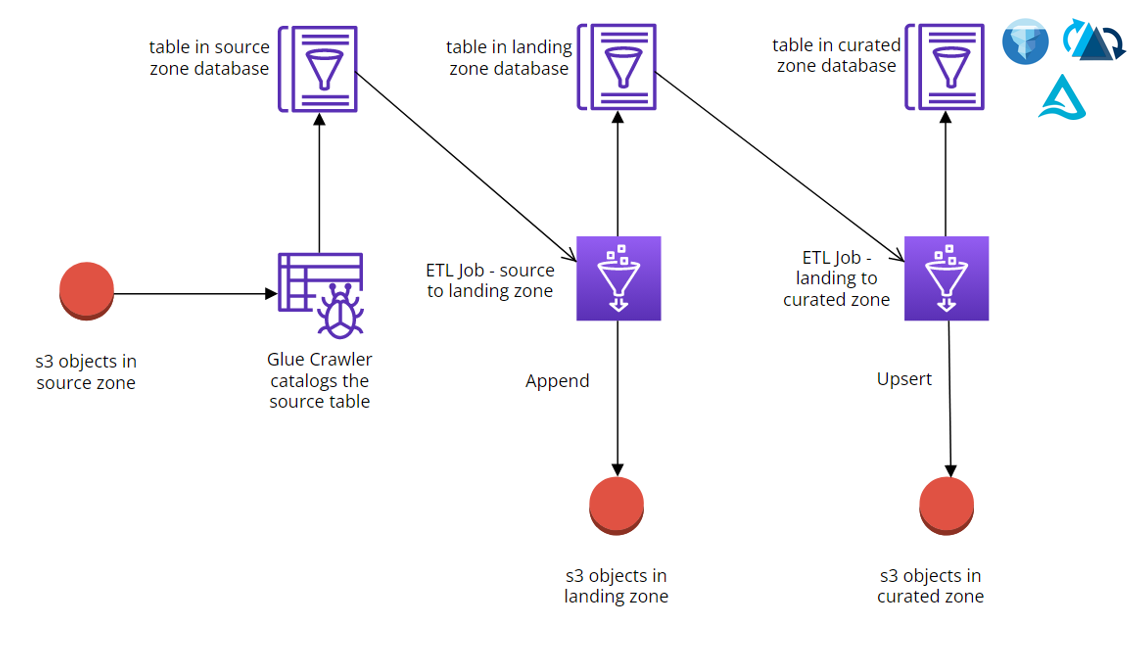

**Passo 1**: Catalogamos Dados na Zona de Origem usando Crawler. Isso disponibilizará o dado na database da source, permitindo consultas pelo Athena;

**Passo 2**: Criaremos um Job de ETL para Limpeza de Dados  e armazenaremos os dados limpos na landing zone. Esse job fará a operação de ***append*** e particionado por data, somente inserindo dados em novas partições. É recomendado que a transformação da Source para a Landing mantenha invariância com relação ao número de linhas, portanto devemos evitar filtros, agrupamentos e atualizações de linhas;

**Passo 3**: Criaremos um Job da landing zone para a curated zone com Conversão para Iceberg e Hudi. Aqui a tabela servirá a propósitos específicos, podendo ser feita qualquer tipo de transformação. Aqui vamos criar uma tabela de captura de dados,  uma estrutura de dados que registra e rastreia as alterações ocorridas em uma tabela. Portanto deve manter a última atualização do usuário para um produto. Isso significa fazer a operação de ***upsert***, inserindo novos ids caso não existam e atualizando as informações caso existam. As informações anteriores não serão perdidas, pois tabelas iceberg permitem consultas com time travel no Athena.

### Catalogando dados com Glue Crawler

1. Em ***Data Catalog***, vá em ***Crawlers*** e clique em ***Create crawler***;
2. Em ***Set crawler properties*** com o nome ***sourceZoneCrawler_video_games_review_amazon***;
3. Em ***Choose data sources and classifiers*** colowue como data source o caminho da tabela na source zone, *s3://bbs-datalake/SourceZone/video_games_review_amazon/*;
4. Em ***Configure security settings***, adicione a role ***GlueETLServiceRole***;
5. Em ***Set output and scheduling*** colo como database target a ***sourcezone***;
6. Revise e clique em ***Create***.

### Criando um job no glue da Source para a Landing Zone

Após criar o código de ETL, vamos agora criar um job no Glue para executá-lo.
1. No painel do Glue, clique em ETL Jobs e escolha Spark script editor. Clque em Create;
2. Cole o sript abaixo. Os comentários do código explicam pontos importantes. Resumidamente, o job recebe como input a tabela catalogada pelo Crawler ***video_games_review*** no database ***sourcezone*** e aplica as operações de ETL que fizemos. Depois cataloga a tabela na processada na landing zone e salva dados  no S3.

```python

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
from pyspark.sql import SparkSession
from awsglue.dynamicframe import DynamicFrame
import pyspark.sql.functions as F
from pyspark.sql.types import TimestampType
from awsglue.dynamicframe import DynamicFrame

import datetime

## @params: [JOB_NAME]
args = getResolvedOptions(sys.argv, ['JOB_NAME','target_db','target_bucket', 'bucket_prefix', 'table_name', 'operation'])

sc = SparkContext()
glueContext = GlueContext(sc)
job = Job(glueContext)
job.init(args['JOB_NAME'], args)
spark = glueContext.spark_session

catalog_name = "glue_catalog"
bucket_name = args['target_bucket']
database_name = args['target_db']
bucket_prefix = args['bucket_prefix']
table_name = args['table_name']
warehouse_path = f"s3://{bucket_name}/{bucket_prefix}/{table_name}"

source_database = 'sourcezone'
source_table_name = 'video_games_review_amazon'


@F.udf(TimestampType())
def parse_datetime(date_string):
    try:
        # Parse the datetime string using a custom format
        dt = datetime.datetime.strptime(date_string, "%m %d, %Y")
        return dt
    except ValueError:
        # Return null if the datetime string cannot be parsed
        return None
    
udf_string_to_len_list = F.udf(lambda x:len([elem for elem in x[1:-1].split(',')]) if x is not None else 0)


def sourceETL_amazon_games_review(dynamic_frame):
    df = dynamic_frame.toDF()
    for column in ['vote','style', 'image', 'reviewerName', 'reviewText', 'summary']:
        df = df.withColumn(column,F.when(F.isnan(F.col(column)),None).otherwise(F.col(column)))
        
    df = df.withColumn("style", F.regexp_replace("style", "'", "\""))
    df_final = df.select(
        F.get_json_object(F.col("style"), "$.Format:").alias("Format_style"),
        F.get_json_object(F.col("style"), "$.Edition:").alias("Edition_style"),
        F.get_json_object(F.col("style"), "$.Platform:").alias("Platform_style"),
        F.get_json_object(F.col("style"), "$.Color:").alias("Color_style"),
        udf_string_to_len_list(F.col("image")).cast('int').alias("number_of_images"),
        parse_datetime(F.col("reviewTime")).cast('timestamp').alias('reviewTime'),
        F.col("overall").cast('int'),
        F.col("verified").cast('boolean'),
        F.col('reviewerID').cast('string'),
        F.col('asin').cast('string'),
        F.col('reviewerName').cast('string'),
        F.col('reviewText').cast('string'),
        F.col('summary').cast('string'),
        F.col('unixReviewTime').cast('bigint'),
        F.col('vote').cast('int'),
        F.lpad(F.col("year").cast("string"), 4, "0").alias("year"),
        F.lpad(F.col("month").cast("string"), 2, "0").alias("month"),
        F.lpad(F.col("day").cast("string"), 2, "0").alias("day")
        )
    return df_final


# Script generated for node adimpression
dyf_node1 = glueContext.create_dynamic_frame.from_catalog(
    database = source_database,
    table_name = source_table_name,
    transformation_ctx="dyf_node1",
    )
    
# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=dyf_node1,
    mappings=[
        ("overall", "int", "overall", "int"),
        ("verified", "boolean", "verified", "boolean"),
        ("reviewtime", "string", "reviewtime", "string"),
        ("reviewerid", "string", "reviewerid", "string"),
        ("asin", "string", "asin", "string"),
        ("reviewername", "string", "reviewername", "string"),
        ("reviewtext", "string", "reviewtext", "string"),
        ("summary", "string", "summary", "string"),
        ("unixreviewtime", "int", "unixreviewtime", "int"),
        ("vote", "string", "vote", "string"),
        ("style", "string", "style", "string"),
        ("image", "string", "image", "string"),
        ("year", "string", "year", "string"),
        ("month", "string", "month", "string"),
        ("day", "string", "day", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

df = sourceETL_amazon_games_review(ApplyMapping_node2)
dyf = DynamicFrame.fromDF(df, glueContext, "dyf")

S3bucket_node3 = glueContext.getSink(
    path=warehouse_path,
    connection_type="s3",
    updateBehavior="UPDATE_IN_DATABASE",
    partitionKeys=['year', 'month', 'day'],
    compression="snappy",
    enableUpdateCatalog=True,
    transformation_ctx="S3bucket_node3",
)

S3bucket_node3.setCatalogInfo(catalogDatabase=database_name, catalogTableName=table_name)
S3bucket_node3.setFormat("glueparquet")
S3bucket_node3.writeFrame(dyf)

job.commit()
                          
```

3. Em ***Job details***, configure os seguintes parâmetros:

- ***Name*** - SourceToLandingJob_amazon_games_review
- ***IAM Role*** - GlueETLServiceRole
- ***Glue Version*** - Glue 4.0 (a última até o momento)
- ***Language*** - Python 3
- ***Worker type*** - G 1x
- Marque ***Automatically scale the number of workers*** (auto escala o número de works, economiza custos)
- ***Requested number of workers*** - 5 (número máximo, mesmo com auto-scaling ligado)
- Marque ***Generate job insights***
- ***Job bookmark*** - Enable (importante, é um checkpoint que indica até onde os dados foram processados)
- Marque ***Flex execution***
- ***Number of retries*** - 0

6. Observando o script do job, alguns parâmetros customizados foram criados. eles indicam o bucket, database e o nome tabela de input, além de indicar o tipo de operação que faremos, ***append***:

- ***--target_db*** - *landingzone*
- ***--table_name*** - *amazon_games_review*
- ***--target_bucket*** - *bbs-datalake*
- ***--operation*** - *append*

7. clique em ***Save*** e depois ***Run***. Caso tenha obtido sucesso na execução do job, poderá consultar a tabela com o Athena.

## Landing para Curated

Com os dados limpos e estruturados na landing zone, podemos criar bases para aplicações específicas. Temos como objetivo criar um sistema de recomendação e classificação de reviews, portanto devemos escolher e fazer o tratamento necessário para tais prpósitos nessas colunas:

1. *Escolher as colunas* - Para um sistema de recomendação de produtos, devemos ter as colunas de id do usuário, id do cliente e o rating. Na base, essas colunas são *reviewerid*, *asin* e *overall*. Para clissificação de textos, adicionaremos também as colunas de reviews *reviewtext* e *summary*. Para informações complementares, também vamos adicionar a data do review, indicada pela coluna *reviewtime*.

2. *Deletar campos nulos* - Para o sistema de classifcação e recomendação, todos os campos de id, texto e rating devem estar preenchidos;

3. *Remover linhas duplicadas* - Remove duplicados caso haja mais de uma avaliação de um usuário para o mesmo produto.


Para explorarmos um pouco mais as capacidades do Glue, vamos criar um job usando o visual:

1. Em Data source, preenche os campos conforme indicado na imagem abaixo, que contém a localização da tabela de input:
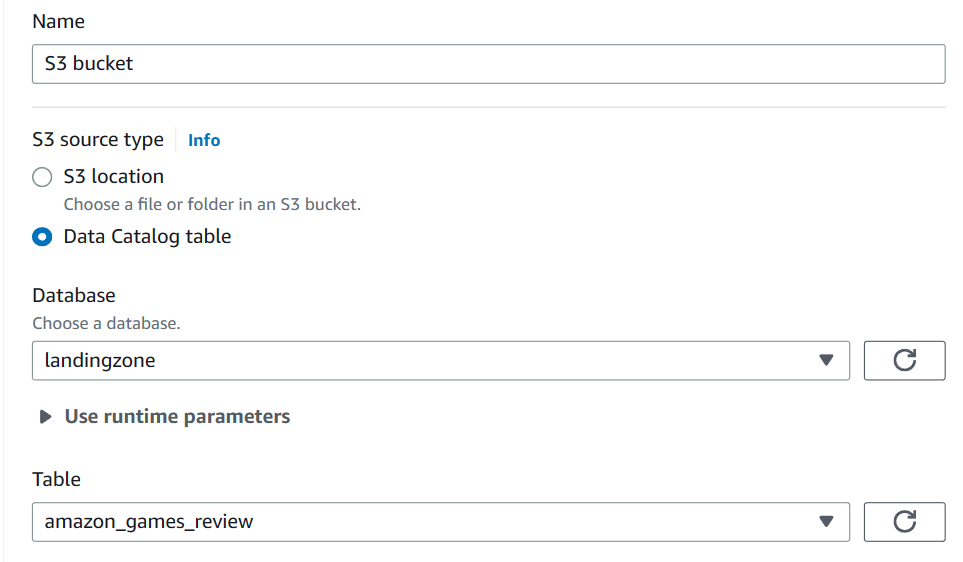

2. No node ApplyMaping, marque as colunas que deverão ser apagadas;
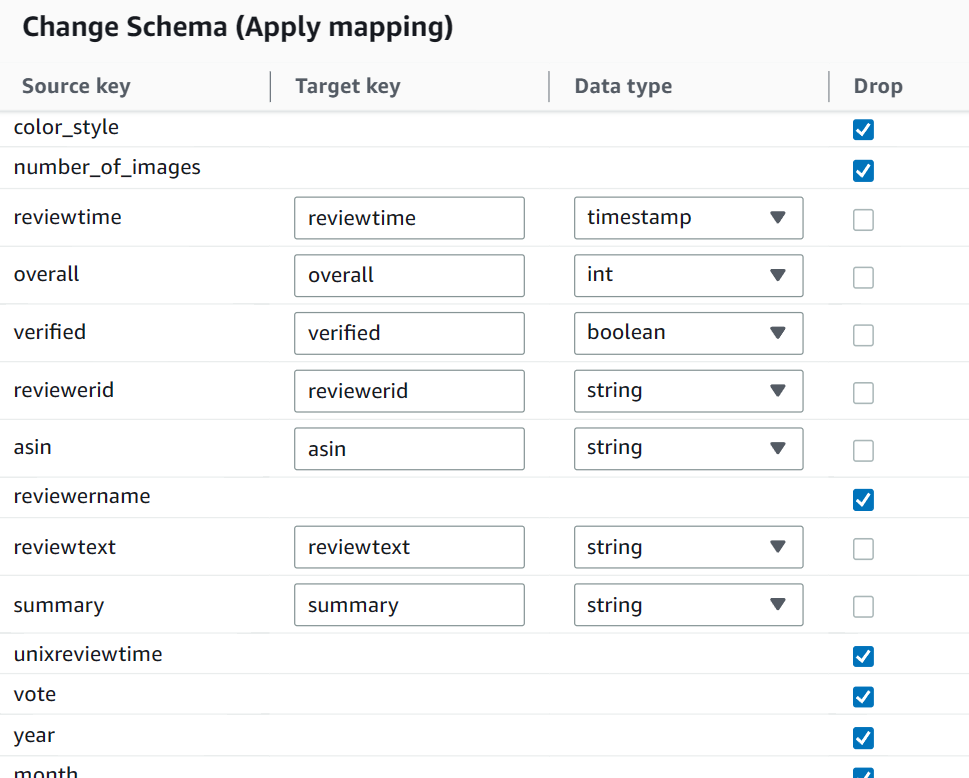

3. No node Drop Null Fiels, marque todas as opções valores que podem representar campos nulos;
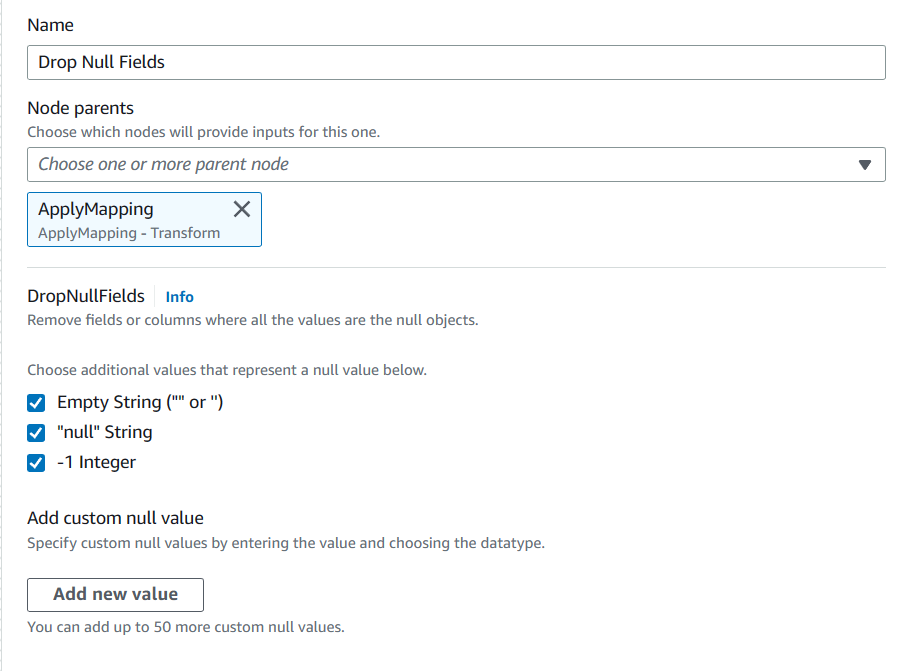

4. No node DropDuplicates, especifique em ***Keys to match rows***, as columas de id do dataframe.
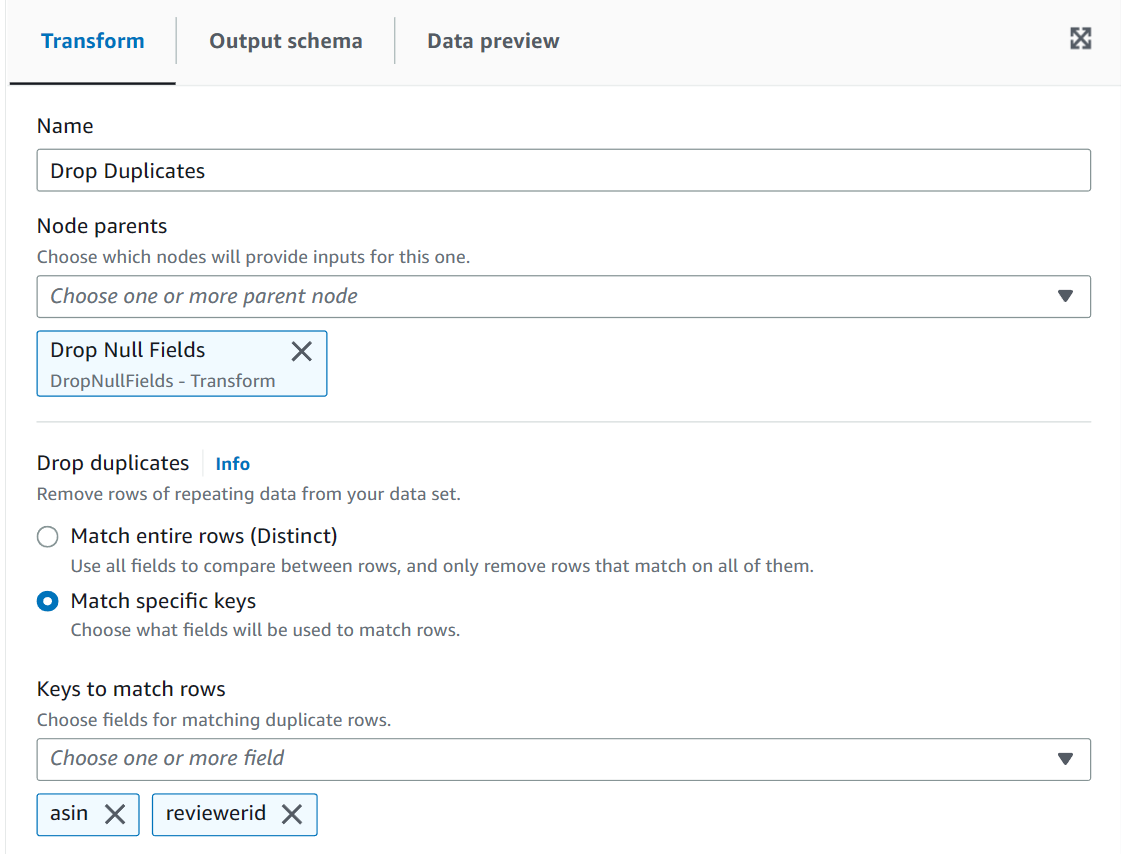

Há muitas opções ainda que poderiam ser utilizadas com o Visual, como filtros, agregações. queries do sql e joins, tornando-a bastante útil em tranformações mais simples. Interente também que a AWS recentemente implentou a criação de tabelas Iceberg, Hudi e Delta diretamente no visual, simplificando bastante criar um datalakehouse com Glue.

### Criando um tabela Iceberg com Glue

1. Ainda no visual, adicione o node de target *Amazon S3*; 
2. Em ***Format***, escolha ***Apache Iceberg***;
3. Em ***Compression Type***, ***Snappy*** costuma ser uma boa escolha, pois tem melhor perfomance em consultas com o Athena. Escolha ***Gzip*** caso o taxa de compressão mais alta dos arquivos forem prioridades;
4. Defina em ***S3 Target Location***, o caminho da curated zone do data lake, ***s3://bbs-datalake/CuratedZone/video_games_review_amazon_iceberg/***;
5. Escolha ***curatedzone*** como database e vamos dar o nome ***video_games_review_amazon_iceberg*** para a tabela de output;
6. Para partition keys, escolha a coluna ***overall***.

No final, o diagrama que criado deverá ser como este:
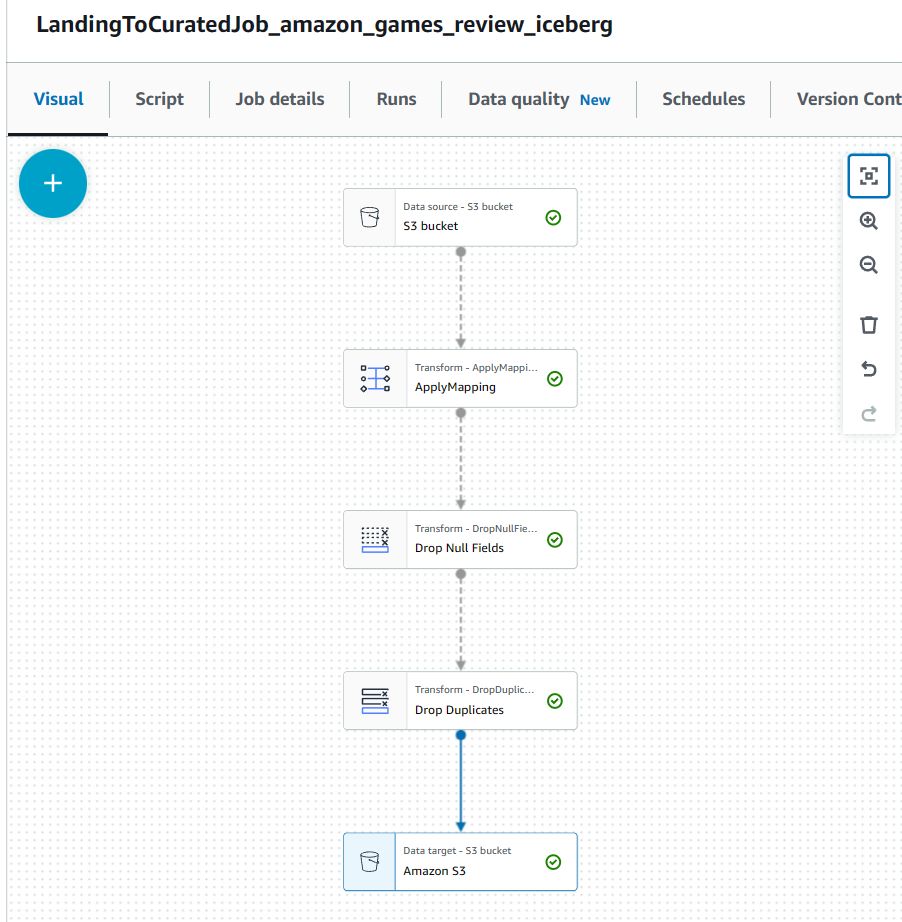

O Script gerado ao criar esse diagrama deverá ser como esse:
    
```python

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
from awsglue.gluetypes import *
from awsglue.dynamicframe import DynamicFrame
from awsglue import DynamicFrame
from pyspark.sql import functions as SqlFuncs


def _find_null_fields(ctx, schema, path, output, nullStringSet, nullIntegerSet, frame):
    #created by Glue to find null fields
    #[...]


def drop_nulls(
    glueContext, frame, nullStringSet, nullIntegerSet, transformation_ctx
) -> DynamicFrame:
    #created by Glue to drop nulls
    #[...]


args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="landingzone",
    table_name="amazon_games_review",
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("reviewtime", "timestamp", "reviewtime", "timestamp"),
        ("overall", "int", "overall", "int"),
        ("verified", "boolean", "verified", "boolean"),
        ("reviewerid", "string", "reviewerid", "string"),
        ("asin", "string", "asin", "string"),
        ("reviewtext", "string", "reviewtext", "string"),
        ("summary", "string", "summary", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Drop Null Fields
DropNullFields_node1685410185522 = drop_nulls(
    glueContext,
    frame=ApplyMapping_node2,
    nullStringSet={"", "null"},
    nullIntegerSet={-1},
    transformation_ctx="DropNullFields_node1685410185522",
)

# Script generated for node Drop Duplicates
DropDuplicates_node1685410247432 = DynamicFrame.fromDF(
    DropNullFields_node1685410185522.toDF().dropDuplicates(["asin", "reviewerid"]),
    glueContext,
    "DropDuplicates_node1685410247432",
)

# Script generated for node Amazon S3
additional_options = {"write.parquet.compression-codec": "snappy"}
tables_collection = spark.catalog.listTables("curatedzone")
table_names_in_db = [table.name for table in tables_collection]
table_exists = "video_games_review_amazon_iceberg" in table_names_in_db
if table_exists:
    AmazonS3_node1685410730401_df = DropDuplicates_node1685410247432.toDF()
    AmazonS3_node1685410730401_df.sortWithinPartitions("overall").writeTo(
        "glue_catalog.curatedzone.video_games_review_amazon_iceberg"
    ).tableProperty("format-version", "2").tableProperty(
        "location",
        "s3://bbs-datalake/CuratedZone/video_games_review_amazon_iceberg",
    ).options(
        **additional_options
    ).partitionedBy(
        "overall"
    ).append()
else:
    AmazonS3_node1685410730401_df = DropDuplicates_node1685410247432.toDF()
    AmazonS3_node1685410730401_df.sortWithinPartitions("overall").writeTo(
        "glue_catalog.curatedzone.video_games_review_amazon_iceberg"
    ).tableProperty("format-version", "2").tableProperty(
        "location",
        "s3://bbs-datalake/CuratedZone/video_games_review_amazon_iceberg",
    ).options(
        **additional_options
    ).partitionedBy(
        "overall"
    ).create()

job.commit()

```

Observe que o job cria uma nova tabela oa catálogo caso ela não exista e, se existe, faz uma operação de ***append***. Caso queiramos uma operação de ***upsert***, devemos modificar a output do código, para algo como

```python

operation = 'upsert'

table_name = 'video_games_review_amazon_iceberg'
database_name = 'curatedzone'
warehouse_path = 's3://bbs-datalake/CuratedZone/video_games_review_amazon_iceberg'
# Script generated for node S3 bucket
tables_collection = spark.catalog.listTables(database_name)
table_names_in_db = [table.name for table in tables_collection]
table_exists = table_name in table_names_in_db
additional_options = {"write.parquet.compression-codec": "snappy"}
if table_exists:
    if operation=='append':
        df = DropDuplicates_node1685423111768.toDF()
        df.sortWithinPartitions('overall').writeTo(
            f"glue_catalog.{database_name}.{table_name}"
        ).tableProperty("format-version", "2").tableProperty(
            "location",
            warehouse_path,
        ).partitionedBy(
            'overall'
        ).options(**additional_options).append()
    if operation=='upsert':
        df = DropDuplicates_node1685423111768.toDF()
        df.registerTempTable("input_data_updates")
        sql_stmnt = f"""
                    MERGE INTO glue_catalog.{database_name}.{table_name} AS data
                    USING input_data_updates AS updates
                    ON data.id = updates.id
                    WHEN MATCHED THEN
                        UPDATE SET *
                    WHEN NOT MATCHED
                        THEN INSERT *
                    """
        print(f"Executing SparkSQL:\n`{sql_stmnt}`")
        spark.sql(sql_stmnt).show()
else:
    df = DropDuplicates_node1685423111768.toDF()
    df.sortWithinPartitions('overall').writeTo(
        f"glue_catalog.{database_name}.{table_name}"
    ).tableProperty("format-version", "2").tableProperty(
        "location",
        warehouse_path,
    ).partitionedBy(
        'overall'
    ).options(**additional_options).create()

job.commit()

```

Veja que agora, caso a tabela exista, podemos escolher entre fazer a operação de ***append*** ou ***upsert*** no código. A query que faz p upsert usa o método MERGE INTO, exclusive de uma tabela iceberg, onde irá atualizar a linha caso dê match com alguma linha já existente. baseado no id  (*WHEN MATCH UPDATE WHEN NOT MATCHED INSERT*)
Em ***Job Details***, mantenha as mesmas configurações do job que criamos da source para a landing. Caso tenha editado o script, assegure-se de que dois parâmetros foram criados, essenciais para executar tabelas icebergs no glue:

***--conf*** - *spark.sql.extensions=org.apache.iceberg.spark.extensions.IcebergSparkSessionExtensions --conf spark.sql.catalog.glue_catalog=org.apache.iceberg.spark.SparkCatalog --conf spark.sql.catalog.glue_catalog.catalog-impl=org.apache.iceberg.aws.glue.GlueCatalog --conf spark.sql.catalog.glue_catalog.io-impl=org.apache.iceberg.aws.s3.S3FileIO --conf spark.sql.catalog.glue_catalog.warehouse=file:///tmp/spark-warehouse*

***--datalake-formats*** - *iceberg*

Agora, salve o job e clique em ***Run***.

### Criando um tabela Delta com Glue

Criar uma tabela Delta usando o Visual do Glue é muito semelhante a criar uma tabela Iceberg. Siga os mesmos passos do tutorial com Iceberg, apenas mude o formato de output para ***Delta Lake***. Por enquanto, não é possível catalogar uma tabela Delta com o Visual. Portanto, teremos que editar o script. Originalmente, o script gerado foi

```python

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
from awsglue.gluetypes import *
from awsglue.dynamicframe import DynamicFrame
from awsglue import DynamicFrame
from pyspark.sql import functions as SqlFuncs


def _find_null_fields(ctx, schema, path, output, nullStringSet, nullIntegerSet, frame):
    #created by Glue to find null fields
    #[...]


def drop_nulls(
    glueContext, frame, nullStringSet, nullIntegerSet, transformation_ctx
) -> DynamicFrame:
    #created by Glue to drop nulls
    #[...]


args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="landingzone",
    table_name="amazon_games_review",
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("reviewtime", "timestamp", "reviewtime", "timestamp"),
        ("overall", "int", "overall", "int"),
        ("verified", "boolean", "verified", "boolean"),
        ("reviewerid", "string", "reviewerid", "string"),
        ("asin", "string", "asin", "string"),
        ("reviewtext", "string", "reviewtext", "string"),
        ("summary", "string", "summary", "string"),
        ("unixreviewtime", "long", "unixreviewtime", "long"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Drop Null Fields
DropNullFields_node1685423083978 = drop_nulls(
    glueContext,
    frame=ApplyMapping_node2,
    nullStringSet={"", "null"},
    nullIntegerSet={-1},
    transformation_ctx="DropNullFields_node1685423083978",
)

# Script generated for node Drop Duplicates
DropDuplicates_node1685423111768 = DynamicFrame.fromDF(
    DropNullFields_node1685423083978.toDF().dropDuplicates(["reviewerid", "asin"]),
    glueContext,
    "DropDuplicates_node1685423111768",
)

# Script generated for node Amazon S3
additional_options = {
    "path": "s3://bbs-datalake/CuratedZone/video_games_review_amazon_iceber/",
    "write.parquet.compression-codec": "snappy",
}
AmazonS3_node1685423181863_df = DropDuplicates_node1685423111768.toDF()
AmazonS3_node1685423181863_df.write.format("delta").options(
    **additional_options
).partitionBy("overall").mode("append").save()

job.commit()

```


Mude o output para

```python

table_name = 'video_games_review_amazon_iceberg'
database_name = 'curatedzone'
table_path = 's3://bbs-datalake/CuratedZone/video_games_review_amazon_iceberg'

additional_options = {
    "path": table_path
}
if operation == 'append' or 'create':
    df = DropDuplicates_node1685423111768.toDF()
    df.write \
        .format("delta") \
        .options(**additional_options) \
        .mode("append") \
        .partitionBy("overall") \
        .saveAsTable(f"{database_name}.{table_name}")
elif operation == 'upsert':
    df = DropDuplicates_node1685423111768.toDF()
    df.registerTempTable("input_data_updates")
    sql_stmnt = f"""
                MERGE INTO glue_catalog.{database_name}.{table_name} AS data
                USING input_data_updates AS updates
                ON data.id = updates.id
                WHEN MATCHED THEN
                    UPDATE SET *
                WHEN NOT MATCHED
                    THEN INSERT *
                """
    print(f"Executing SparkSQL:\n`{sql_stmnt}`")
    spark.sql(sql_stmnt).show()
    
```

Note que, para a operação de upsert, o Delta tem a mesma sintaxe utilizada para Iceberg. Ao editar o script, garanta que as seguintes parâmetros foram adicionados:
- ***--conf*** - *spark.sql.extensions=io.delta.sql.DeltaSparkSessionExtension --conf spark.sql.catalog.spark_catalog=org.apache.spark.sql.delta.catalog.DeltaCatalog*
- ***--datalake-formats*** - *delta*

### Criando um tabela Hudi com Glue

Ao escolher a tabela Hudi como formato target, algumas opçoes particulares dessa tecnologia irão aparecer. Vamos entender cada uma:
    
- **Hudi Storage Type**  - Ao escolher *Merge-on-read*, duas tabelas serão criadas, table_ro - otimizada para leitura, e table_rt, uma tabela que exibe o conteúdo em tempo realao fazer o merge no momento da leitura entre a table_ro e os novos arquivos chegando em streaming. Como nosso arquitetura funciona em batch e não streaming, o modo *Copy-on-write( já serve aos nossos propósitos;

- **Hudi Write Operation** - Aqui podemos escolher entre *upsert*, *insert* e *bulk insert* (insert em grande quantidade). Da mesma maneira que fizemos nas tabelas anteriores, vamos escolher *upsert*;

- **Hudi Record Key Fields** - Para primary key, devemos escolher *reviewerid* e *asin* combinadas;

- **Hudi Deduplicate Records by Field Value** -  Basicamente, a operação vai selecionar a linha com maior valor nesse campo manter caso tenha duplicados. Vamos escolher uma variável de timestamp *reviewtime* para manter a informação mais recente.

Agora proceda definindo o caminho da tabela no S3, partições, e nome da base e tabela alvo conforme feito com a tabela Iceberg. 
No script, devemos ter o código abaixo

```python

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
from awsglue.gluetypes import *
from awsglue.dynamicframe import DynamicFrame
from awsglue import DynamicFrame
from pyspark.sql import functions as SqlFuncs


def _find_null_fields(ctx, schema, path, output, nullStringSet, nullIntegerSet, frame):
    #created by Glue to find null fields
    #[...]


def drop_nulls(
    glueContext, frame, nullStringSet, nullIntegerSet, transformation_ctx
) -> DynamicFrame:
    #created by Glue to drop nulls
    #[...]



args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="landingzone",
    table_name="amazon_games_review",
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("reviewtime", "timestamp", "reviewtime", "timestamp"),
        ("overall", "int", "overall", "int"),
        ("reviewerid", "string", "reviewerid", "string"),
        ("asin", "string", "asin", "string"),
        ("reviewtext", "string", "reviewtext", "string"),
        ("summary", "string", "summary", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Drop Null Fields
DropNullFields_node1685506452521 = drop_nulls(
    glueContext,
    frame=ApplyMapping_node2,
    nullStringSet={"", "null"},
    nullIntegerSet={-1},
    transformation_ctx="DropNullFields_node1685506452521",
)

# Script generated for node Drop Duplicates
DropDuplicates_node1685506476034 = DynamicFrame.fromDF(
    DropNullFields_node1685506452521.toDF().dropDuplicates(["asin", "reviewerid"]),
    glueContext,
    "DropDuplicates_node1685506476034",
)

# Script generated for node Amazon S3
additional_options = {
    "hoodie.table.name": "video_games_review_amazon_hudi",
    "hoodie.datasource.write.table.type": "COPY_ON_WRITE",
    "hoodie.datasource.write.operation": "upsert",
    "hoodie.datasource.write.recordkey.field": "asin,reviewerid",
    "hoodie.datasource.write.precombine.field": "reviewtime",
    "hoodie.datasource.write.partitionpath.field": "overall",
    "hoodie.datasource.write.hive_style_partitioning": "true",
    "hoodie.parquet.compression.codec": "snappy",
    "hoodie.datasource.hive_sync.enable": "true",
    "hoodie.datasource.hive_sync.database": "curatedzone",
    "hoodie.datasource.hive_sync.table": "video_games_review_amazon_hudi",
    "hoodie.datasource.hive_sync.partition_fields": "overall",
    "hoodie.datasource.hive_sync.partition_extractor_class": "org.apache.hudi.hive.MultiPartKeysValueExtractor",
    "hoodie.datasource.hive_sync.use_jdbc": "false",
    "hoodie.datasource.hive_sync.mode": "hms",
}
AmazonS3_node1685506523224_df = DropDuplicates_node1685506476034.toDF()
AmazonS3_node1685506523224_df.write.format("hudi").options(**additional_options).mode(
    "append"
).save("s3://bbs-datalake/CuratedZone/video_games_review_amazon_hudi/")

job.commit()

```

## Queries com a tabela Iceberg usando Athena

Dentre as três tecnologias de data lakehouse que avaliamos, Iceberg é a única que permite a escrita na tabela usando o Athena. Isso nos permite alterar, criar ou renomear colunas, mudar propriedades e fazer a manutenção somente com queries. 

#### query 1
```sql
OPTIMIZE iceberg_table REWRITE DATA USING BIN_PACK
  WHERE catalog = 'c1'
```
realiza a compactação de arquivos pequenos, o que aumenta a velocidade de leitura em queries.
Cada query otimiza no máximo 100 partições por vez.

#### query 2
```sql
VACUUM iceberg_table
```
exclui arquivos expirados. Ao realizar a compacatção, um novo arquivo é criado, mas os arquivos pequenos não são excluídos, mas são ignorados por qualquer consulta. São chamados de ***arquivos órfãoes***. Após um prazo de expiração, esses arquivos seão deletados após uma operação de VACUUM. Também são excluídos nessa operação arquivos que apontam para ***snapshots expirados***, ou seja, que não podem ser buscados por viagem no tempo.
Cada query exclui no máximo 1000 arquivos por vez. 

#### query 3
```sql
ALTER TABLE iceberg_table SET TBLPROPERTIES (
  'vacuum_max_snapshot_age_seconds'='259200',
  'write_target_data_file_size_bytes'='536870912'
)
```
altera propriedades da tabela. O exemplo acima define como 5 dias o período de expiração de um arquivo e 512 MB o tamanho do arquivo gerado após compactação.

#### query 4
```sql
ALTER TABLE iceberg_table ADD COLUMNS (comment string)
ALTER TABLE iceberg_table DROP COLUMN userid
```
adiciona ou remove colunas da tabela

#### query 5
```sql
SELECT * FROM iceberg_table FOR TIMESTAMP AS OF TIMESTAMP '2023-05-31 10:00:00 UTC'
```
retorna a tabela como era na data especificada (time travel).